In [36]:
import sys
sys.path.append("../../Hi-C-embedding/GraphEmbedding")
import pandas as pd
import numpy as np
from ge import LINE
import networkx as nx
from ge.classify import read_node_label
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [48]:
def plot_embeddings(embeddings,):
    X, Y = read_node_label('../../Hi-C-embedding/GraphEmbedding/data/wiki/wiki_labels.txt')
 
    emb_list = []
    color_idx = {}
    
    idx = 0
    for k,c in zip(X,Y):
        if int(k) in embeddings:
            emb_list.append(embeddings[int(k)])
            color_idx.setdefault(c[0], [])
            color_idx[c[0]].append(idx)
            idx = idx + 1
    
    emb_list = np.array(emb_list)

    model = TSNE(n_components=2)
    node_pos = model.fit_transform(emb_list)

    

    for c, idx in color_idx.items():
        plt.scatter(node_pos[idx, 0], node_pos[idx, 1], label=c)
    plt.legend()
    plt.show()

In [6]:
wiki_edge_list = pd.read_csv("../../Hi-C-embedding/GraphEmbedding/data/wiki/Wiki_edgelist.txt", sep = " ", header = None)
wiki_edge_list.columns = ['source','target']
wiki_edge_list.sort_values(by=['source','target'], inplace = True)
uni_dir_wiki_edge_list = wiki_edge_list[wiki_edge_list['source']<=wiki_edge_list['target']]

uni_G = nx.from_pandas_edgelist(uni_dir_wiki_edge_list, 'source', 'target', create_using=nx.DiGraph())
bi_G = nx.from_pandas_edgelist(wiki_edge_list, 'source', 'target', create_using=nx.DiGraph())

In [17]:
model = LINE(uni_G, embedding_size=128, order='second')
model.train(batch_size=1024, epochs=50, verbose=2)
uni_embeddings = model.get_embeddings()

model = LINE(bi_G, embedding_size=128, order='second')
model.train(batch_size=1024, epochs=50, verbose=2)
bi_embeddings = model.get_embeddings()

Epoch 1/50
0s - loss: 24.9007
Epoch 2/50
0s - loss: 23.0663
Epoch 3/50
0s - loss: 20.8599
Epoch 4/50
0s - loss: 18.8576
Epoch 5/50
0s - loss: 16.9629
Epoch 6/50
0s - loss: 15.3708
Epoch 7/50
0s - loss: 13.4913
Epoch 8/50
0s - loss: 12.4852
Epoch 9/50
0s - loss: 11.1901
Epoch 10/50
0s - loss: 10.0446
Epoch 11/50
0s - loss: 9.0046
Epoch 12/50
0s - loss: 8.0055
Epoch 13/50
0s - loss: 6.9471
Epoch 14/50
0s - loss: 6.3851
Epoch 15/50
0s - loss: 5.6901
Epoch 16/50
0s - loss: 5.0736
Epoch 17/50
0s - loss: 4.5048
Epoch 18/50
0s - loss: 4.1295
Epoch 19/50
0s - loss: 3.5944
Epoch 20/50
0s - loss: 3.2761
Epoch 21/50
0s - loss: 2.9958
Epoch 22/50
0s - loss: 2.7363
Epoch 23/50
0s - loss: 2.5191
Epoch 24/50
0s - loss: 2.3257
Epoch 25/50
0s - loss: 2.1209
Epoch 26/50
0s - loss: 1.9551
Epoch 27/50
0s - loss: 1.8778
Epoch 28/50
0s - loss: 1.7642
Epoch 29/50
0s - loss: 1.6124
Epoch 30/50
0s - loss: 1.5311
Epoch 31/50
0s - loss: 1.4514
Epoch 32/50
0s - loss: 1.4100
Epoch 33/50
0s - loss: 1.3371
Epoch 34/

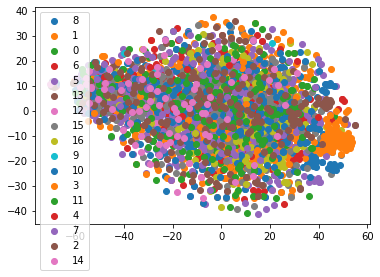

In [49]:
plot_embeddings(bi_embeddings)

2405
2405
2230


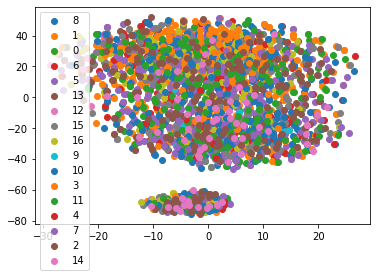

In [47]:
plot_embeddings(uni_embeddings)